In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("All libraries imported successfully!")

All libraries imported successfully!


In [ ]:
df = pd.read_csv('BankChurners.csv')

print(f"Dataset loaded successfully!")
print(f"\n Number of customers: {len(df)}")
print(f"\n Number of features: {len(df.columns)}")
print("\n Dataset:")
df.head(25)

Dataset loaded successfully!

 Number of customers: 10000

 Number of features: 21

 Dataset:


,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,1,56,F,0,Post-Graduate,Married,$60K - $80K,Blue,29,1,...,0,5215.377956,1500,12316.684082,2.386442,12818,17,3.396678,0.072683,Existing Customer
1,2,69,M,1,Post-Graduate,Divorced,$80K - $120K,Blue,14,1,...,1,30850.435692,2091,1473.371649,3.760390,11277,56,2.533543,0.770736,Existing Customer
2,3,46,F,0,College,Single,$80K - $120K,Silver,29,1,...,4,17577.316701,349,22157.377493,3.237004,10198,55,0.314965,0.333839,Existing Customer
3,4,32,F,2,College,Married,$60K - $80K,Blue,21,2,...,3,31611.931114,1958,29765.184830,2.290414,9284,139,2.764372,0.952847,Attrited Customer
4,5,60,F,4,Uneducated,Married,$40K - $60K,Blue,19,3,...,6,32708.110007,2070,29349.031140,1.444469,3536,113,1.891824,0.622096,Attrited Customer
5,6,25,F,5,High School,Married,$40K - $60K,Blue,25,6,...,0,28921.125055,660,9336.252533,3.341281,3150,127,0.237019,0.674925,Existing Customer
6,7,38,F,5,Graduate,Single,$80K - $120K,Blue,22,6,...,2,14836.770713,2406,28834.305090,1.953151,18119,59,3.656204,0.583896,Attrited Customer
7,8,56,F,3,Post-Graduate,Married,$60K - $80K,Blue,34,2,...,1,15023.851398,1612,12229.684477,3.500461,7899,40,0.933478,0.452132,Existing Customer
8,9,36,M,1,High School,Divorced,$80K - $120K,Blue,40,4,...,5,33858.555889,734,11617.296354,2.402197,10854,58,3.810007,0.339233,Existing Customer
9,10,40,M,1,High School,Married,Less than $40K,Blue,54,1,...,0,12449.629435,396,24949.500210,2.828610,13135,94,2.008841,0.158864,Attrited Customer


In [60]:
import pandas as pd

summary_table = pd.DataFrame({
    "Column Name": df.columns,
    "Data Type": df.dtypes.astype(str),
    "Non-Null Count": df.notnull().sum().values
})

summary_table.index = range(1, len(summary_table) + 1)

print("Column Names and Data Types:\n")
summary_table

Column Names and Data Types:



,Column Name,Data Type,Non-Null Count
1,CLIENTNUM,int64,10000
2,Customer_Age,int64,10000
3,Gender,str,10000
4,Dependent_count,int64,10000
5,Education_Level,str,10000
6,Marital_Status,str,10000
7,Income_Category,str,10000
8,Card_Category,str,10000
9,Months_on_book,int64,10000
10,Total_Relationship_Count,int64,10000


In [65]:
print("\nBasic Statistics About Each Column:\n")

df_no_id = df.drop(columns=["CLIENTNUM"])

basic_stats = df_no_id.describe().T

basic_stats = basic_stats.rename(columns={
    "count": "Count",
    "mean": "Mean",
    "std": "Standard Deviation",
    "min": "Minimum",
    "25%": "First Quartile (Q1)",
    "50%": "Median (Q2)",
    "75%": "Third Quartile (Q3)",
    "max": "Maximum"
})

basic_stats


Basic Statistics About Each Column:



,Count,Mean,Standard Deviation,Minimum,First Quartile (Q1),Median (Q2),Third Quartile (Q3),Maximum
Customer_Age,10000.0,45.170900,15.876546,18.000000,32.000000,45.000000,59.000000,72.000000
Dependent_count,10000.0,2.481700,1.713931,0.000000,1.000000,2.000000,4.000000,5.000000
Months_on_book,10000.0,34.621100,12.752059,13.000000,23.000000,35.000000,45.000000,56.000000
Total_Relationship_Count,10000.0,3.498800,1.718049,1.000000,2.000000,3.000000,5.000000,6.000000
Months_Inactive_12_mon,10000.0,2.984900,2.010790,0.000000,1.000000,3.000000,5.000000,6.000000
Contacts_Count_12_mon,10000.0,3.025500,1.998762,0.000000,1.000000,3.000000,5.000000,6.000000
Credit_Limit,10000.0,17933.943553,9765.982365,1016.598343,9454.221427,17970.611023,26318.961983,34987.371550
Total_Revolving_Bal,10000.0,1504.810900,862.523774,1.000000,758.000000,1491.000000,2246.000000,2999.000000
Avg_Open_To_Buy,10000.0,14987.367252,8647.294824,2.937021,7390.824380,15030.048029,22473.750883,29993.262862
Total_Amt_Chng_Q4_Q1,10000.0,2.010982,1.161713,0.000110,1.002280,2.016345,3.029156,3.999450


In [26]:
# Check for missing values
print("Checking for missing values:")

total_missing = df.isnull().sum().sum()

if total_missing == 0:
    print("\n  No missing values! Data is clean!")
    
else:
    print(f"\n Found {total_missing} missing values:")
    missing = df.isnull().sum()
    for col, count in missing[missing > 0].items():
        pct = (count / len(df)) * 100
        print(f"   {col}: {count} ({pct:.2f}%)")

Checking for missing values:

  No missing values! Data is clean!


 Churn Distribution:
Attrition_Flag
Existing Customer    6341
Attrited Customer    3659
Name: count, dtype: int64

 Churn Percentage:
Attrition_Flag
Existing Customer    63.41
Attrited Customer    36.59
Name: proportion, dtype: float64


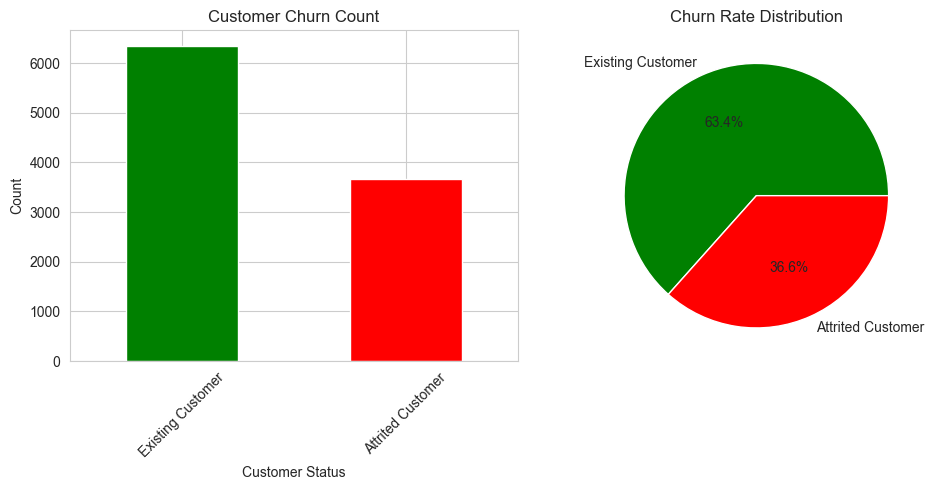


 Insight: 36.6% of customers have churned!


In [74]:
print(" Churn Distribution:")
print(df['Attrition_Flag'].value_counts())

print("\n Churn Percentage:")
churn_rate = (df['Attrition_Flag'].value_counts(normalize=True) * 100).round(2)
print(churn_rate)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['Attrition_Flag'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Customer Churn Count')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
df['Attrition_Flag'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Churn Rate Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()

print(f"\n Insight: {churn_rate.iloc[1]:.1f}% of customers have churned!")

In [72]:
print("\n Sample data set of key features:\n")
df[important_cols + ['Attrition_Flag']].head(10)



 Sample data set of key features:



,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Attrition_Flag
0,56,0,29,1,2,0,5215.377956,1500,12818,17,Existing Customer
1,69,1,14,1,0,1,30850.435692,2091,11277,56,Existing Customer
2,46,0,29,1,0,4,17577.316701,349,10198,55,Existing Customer
3,32,2,21,2,0,3,31611.931114,1958,9284,139,Attrited Customer
4,60,4,19,3,5,6,32708.110007,2070,3536,113,Attrited Customer
5,25,5,25,6,0,0,28921.125055,660,3150,127,Existing Customer
6,38,5,22,6,6,2,14836.770713,2406,18119,59,Attrited Customer
7,56,3,34,2,3,1,15023.851398,1612,7899,40,Existing Customer
8,36,1,40,4,2,5,33858.555889,734,10854,58,Existing Customer
9,40,1,54,1,5,0,12449.629435,396,13135,94,Attrited Customer
